# Computer Vision Project - Face Recognition

### Project Description:

In this hands-on project, the goal is to build a face identification model to recognize faces.

### Data Description:
Aligned Face Dataset from Pinterest

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

### Objective:
In this problem, we use a pre-trained model trained on Face recognition to recognize similar faces. Here, we are particularly interested in recognizing whether two given faces are of the same person or not.

### Select TensorFlow version 2.x in colab

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

### Initialize the random number generator

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Mount Google drive on google colab


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Import necessary modules

In [4]:
#import numpy to convert python lists to numpy arrays as 
import numpy as np
from numpy import load
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

### Change current working directory to project folder

In [5]:
#import os module for reading training data directories and paths
import os
project_path = '/content/drive/My Drive/AIML/MODULE_PROJECT/ACV_Project_Face_Recognition/'
os.chdir('/content/drive/My Drive/AIML/MODULE_PROJECT/ACV_Project_Face_Recognition/')

In [6]:
path = os.getcwd()
print(path)

/content/drive/My Drive/AIML/MODULE_PROJECT/ACV_Project_Face_Recognition


### Load the dataset

In [7]:
images_path = project_path + "Aligned Face Dataset from Pinterest.zip"
print(images_path)

/content/drive/My Drive/AIML/MODULE_PROJECT/ACV_Project_Face_Recognition/Aligned Face Dataset from Pinterest.zip


### Extract the zip file.

Extract Aligned Face Dataset from Pinterest.zip

In [8]:
from zipfile import ZipFile

with ZipFile(images_path, 'r') as z:
  z.extractall()
  print(" Aligned Face Dataset from Pinterest zip extraction done!")

 Aligned Face Dataset from Pinterest zip extraction done!


In [9]:
!ls

 ACV_Project_Face_Recognition.ipynb	    pins   vgg_face_weights.h5
'Aligned Face Dataset from Pinterest.zip'   PINS


### Create the Metadata

### Function to load images

Define a function to load the images from the extracted folder and map each image with person id

In [10]:

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

### Define function to load image

In [11]:
#import OpenCV module
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

### Check some samples of metadata.

### Load a sample image.

Load one image using the function "load_image"

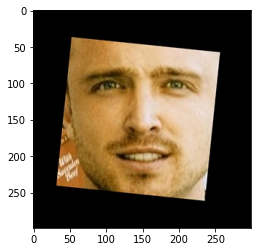

In [12]:
plt.imshow(load_image('/content/drive/My Drive/AIML/MODULE_PROJECT/ACV_Project_Face_Recognition/PINS/pins_Aaron Paul/Aaron Paul138_233.jpg'))
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


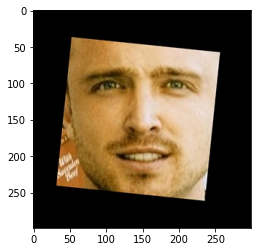

In [13]:
sampleimage = load_image(str(metadata[19]))
print(sampleimage)
plt.imshow(load_image(str(metadata[19])))

### Load the pre-trained model and weights

### VGG Face model

The predefined model for VGG face

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

### Load the model 

Load the model defined above

Then load the given weight file named "vgg_face_weights.h5"

In [15]:
model = vgg_face()
model.load_weights(project_path + '/vgg_face_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [16]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate Embeddings vectors for each image in the dataset

 Load the first image in the metadata and get its embedding vector from the pre-trained model.

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images

Code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings.

If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [19]:
# create an empty list embeddings
embeddings = []
# loop through the metadata
for i in range(metadata.shape[0]):
  # Get embedding vector for the image in the metadata using the pre-trained model
  img_path = metadata[i].image_path()
  img = load_image(img_path)

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
  try:
    embeddings.insert(i, vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0])
  except:
    print("Error - need to adding np.zeros")
    embeddings.insert(i, np.zeros(2622))

### Build distance metrics for identifying the distance between two given images.

### Function to calculate distance between given 2 pairs of images.

 * Consider distance metric as "Squared L2 distance"

 * Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below

2, 3 and 2, 180

30, 31 and 30, 100

70, 72 and 70, 115

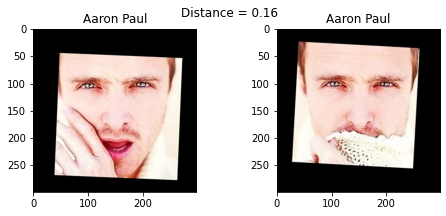

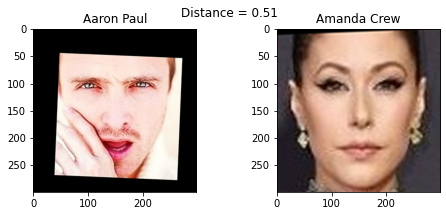

In [21]:
# import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(121).title.set_text(metadata[idx1].name.split("_")[1])
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    
    plt.subplot(122).title.set_text(metadata[idx2].name.split("_")[1])
    
show_pair(2, 3)
show_pair(2, 180)

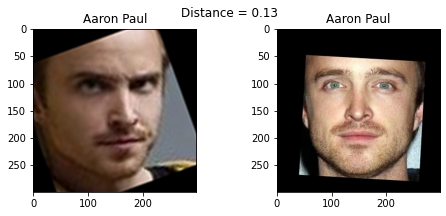

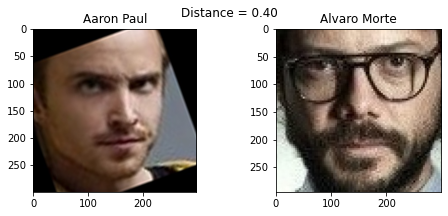

In [22]:
show_pair(30, 31)
show_pair(30, 100)

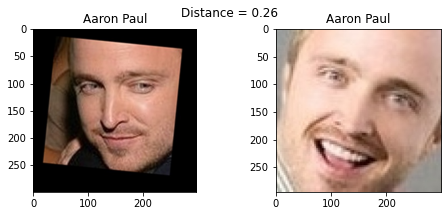

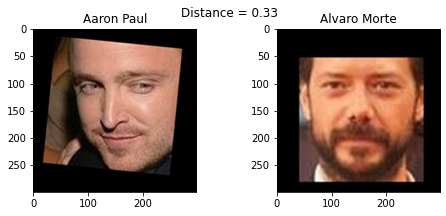

In [23]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets

* Create X_train, X_test and y_train, y_test

* Use train_idx to seperate out training features and labels

* Use test_idx to seperate out testing features and labels

In [24]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#Embeddings as an array
embeddings = np.asarray(embeddings)

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9573, 2622)
(9573,)
(1197, 2622)
(1197,)


### Encode the Labels 

* Encode the targets

* Use LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encode = encoder.fit_transform(y_train)
y_test_encode = encoder.fit_transform(y_test)

### Standardize the feature values

* Scale the features using StandardScaler

In [27]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sscaler = sc.fit_transform(X_train)
X_test_sscaler = sc.fit_transform(X_test)

### Reduce dimensions using PCA

* Reduce feature dimensions using Principal Component Analysis

* Set the parameter n_components=128

In [28]:
from sklearn.decomposition import PCA
# Declaring the PCA with 128 components
pca = PCA(n_components=128)
pca.fit(X_train_sscaler)

# Loading the transformed inputs into new dataset
X_train_pca = pca.transform(X_train_sscaler)
X_test_pca = pca.transform(X_test_sscaler)

In [29]:
# Shape of standardised input can be seen as having 2622 dimensions
print(X_train_sscaler.shape)

# After PCA, the same vector has got only 128 dimensions
print(X_train_pca.shape)

(9573, 2622)
(9573, 128)


### Build SVM classifier to map each image to its right person

Use SVM Classifier to predict the person in the given image

Fit the classifier and print the score

In [30]:
from sklearn.svm import SVC

svc = SVC(C=1, gamma=0.001)
svc.fit(X_train_pca, y_train_encode)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
linearSVC = LinearSVC()
linearSVC.fit(X_train, y_train)

acc_svc = accuracy_score(y_test, linearSVC.predict(X_test))
print(f'Accuracy Score = {acc_svc}')


Accuracy Score = 0.9682539682539683


### Predict using the SVM model

* Testing 10th image from test set and plot the image

* Report to which person(folder name in dataset) the image belongs to

Image path: PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg


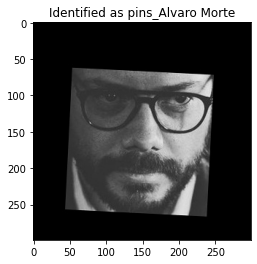

In [32]:
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([X_test_pca[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print('Image path:', metadata[test_idx][example_idx].image_path())

In [33]:
def predict_image_identity(index):
  example_idx = index
  example_image = load_image(metadata[test_idx][example_idx].image_path())
  example_prediction = svc.predict([X_test_pca[example_idx]])
  example_identity = encoder.inverse_transform(example_prediction)[0]
  plt.imshow(example_image)
  plt.title(f'Identified as {example_identity} || original identity {metadata[test_idx][example_idx].name}');
  print('Image path:', metadata[test_idx][example_idx].image_path())

Image path: PINS/pins_Aaron Paul/Aaron Paul119_219.jpg


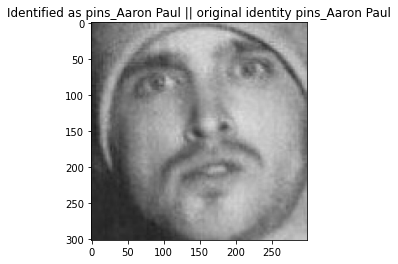

In [34]:
predict_image_identity(1)

Image path: PINS/pins_Neil Patrick Harris/Neil Patrick Harris1.jpg


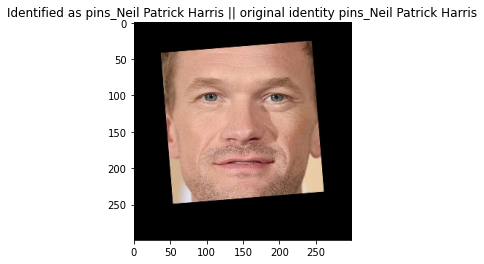

In [35]:
predict_image_identity(500)

Image path: PINS/pins_kiernan shipka /kiernan shipka 73.jpg


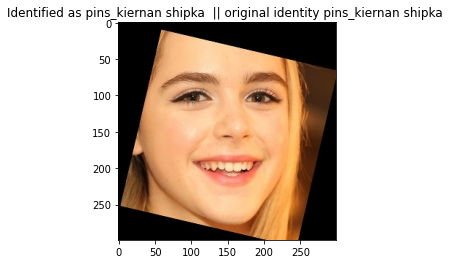

In [36]:
predict_image_identity(1030)